In [1]:
%run libs/Libs.ipynb

In [2]:
%run unitary_operations.ipynb

In [3]:
num_of_qubits =4

In [4]:
qubit_seq =[i for i in range(num_of_qubits)]
qubit_seq

[0, 1, 2, 3]

I is Identity matrix of dimension <br/>
(number_of_qubits x number_of_qubits)

In [35]:
#Custom I; Capturing  

In [5]:
#Define a Quantum Register
q_reg = QuantumRegister(num_of_qubits, "|0> :q_reg")
#Define a Classical Register
c_reg = ClassicalRegister(num_of_qubits, "c_reg")

**CIRCUIT SPACE**

In [6]:
#Define a Quantum Circuit
q_circ = QuantumCircuit(q_reg, c_reg)

In [7]:
#initial state vector of all 4 qubits combined(kron product of |0>)
psi = Statevector(q_circ)
psi.draw(output="latex")

<IPython.core.display.Latex object>

In [8]:
#Applying Hadamard gate on each circuit(horizontal lines, vertically)
for i in range(num_of_qubits):
    q_circ.h(i)

In [13]:
#q_circ.draw("mpl")

In [9]:
psi_state_1 = Statevector(q_circ)
psi_state_1.draw(output="latex")
#Quantum Parallelism

<IPython.core.display.Latex object>

In [10]:
#Custom Unitary Gate/Operation
#custom_unitary = Operator(do_nothing())
#q_circ.unitary(custom_unitary, qubit_seq, label='Oracle')
q_circ.z(0)
q_circ.z(1)

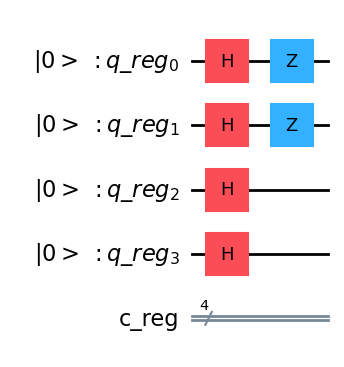

In [11]:
q_circ.draw("mpl")

In [12]:
psi_state_2 = Statevector(q_circ)
psi_state_2.draw(output="latex")

<IPython.core.display.Latex object>

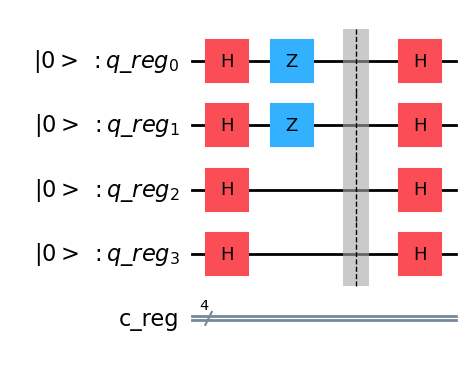

In [13]:
q_circ.barrier([0,1,2,3])
#Applying Hadamard gate on each circuit(horizontal lines, vertically)
for i in range(num_of_qubits):
    q_circ.h(i)

q_circ.draw("mpl")

In [16]:
psi_state_3 = Statevector(q_circ)

#Add a barrier (to avoid misalignment of gates)
q_circ.barrier(qubit_seq)
psi_state_3.draw(output="latex")
#Little Endian

<IPython.core.display.Latex object>

In [17]:
#Now Measure all qubits | by default in Z-Basis
q_circ.measure([0, 1,2,3], [0,1,2,3])

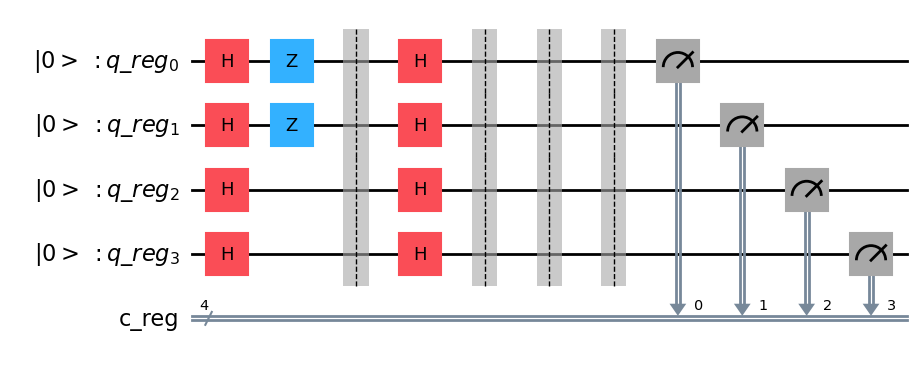

In [18]:
#Draw Image
q_circ.draw("mpl")

In [19]:
psi.draw(output="latex")

<IPython.core.display.Latex object>

In [41]:
psi_state_1.draw(output="latex")

<IPython.core.display.Latex object>

In [42]:
psi_state_2.draw(output="latex")

<IPython.core.display.Latex object>

In [43]:
psi_state_3.draw(output="latex")

<IPython.core.display.Latex object>

**CIRCUIT SPACE**

state_vector = Statevector(q_circ)
state_vector

In [44]:
simulator = AerSimulator()
trans_circ= transpile(q_circ, simulator)
res = simulator.run(trans_circ, shots=1024).result()

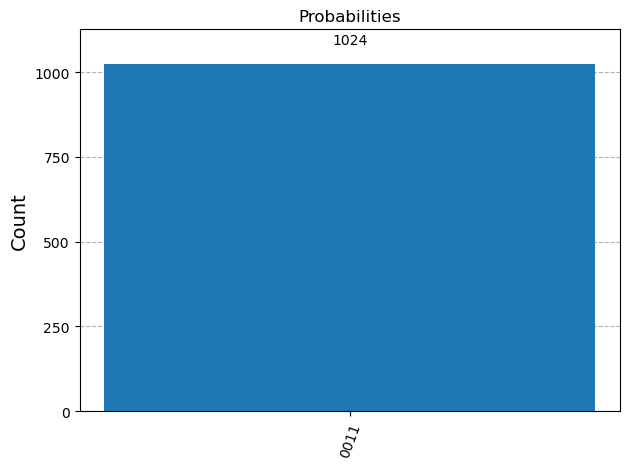

In [45]:
plot_histogram(res.get_counts(), title="Probabilities")

In [ ]:
#O(1) 
#O(N)
#Quantum Advantage